## CRM-RFM Analysis/Digital Marketing Analysis

In [96]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix
from sklearn import preprocessing
import math

%matplotlib inline
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 160)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [98]:
## Importing Data
CRM_Data = pd.read_csv(r"C:\Users\hp\Desktop\python\CRM_RFM Analysis\CRM_RFM Dataset.csv")
CRM_Data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,AmountWines,AmountFruits,AmountMeatProducts,AmountFishProducts,AmountSweetProducts,AmountGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000,0,0,04/09/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,08/03/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,21/08/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000,1,0,10/02/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000,1,0,19/01/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.000,0,1,09/09/2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.000,0,1,13/11/2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.000,1,0,08/05/2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.000,1,0,06/06/2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.000,1,1,13/03/2014,68,28,0,6,1,1,13,1,1,0,0,20,0,0,1,0,0,0,3,11,0


In [7]:
CRM_Data.info()

print('\033[1m' + 10*"*" + ' ERROR ' + 10*"*" + '\033[0m')
print(f"There's a wrong format in the Year_Birth and Dt_Customer")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   AmountWines          2240 non-null   int64  
 10  AmountFruits         2240 non-null   int64  
 11  AmountMeatProducts   2240 non-null   int64  
 12  AmountFishProducts   2240 non-null   int64  
 13  AmountSweetProducts  2240 non-null   int64  
 14  AmountGoldProds      2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [100]:
CRM_Data["Year_Birth"] = pd.to_datetime(CRM_Data["Year_Birth"], format="%Y")
CRM_Data["Dt_Customer"] = pd.to_datetime(CRM_Data["Dt_Customer"], dayfirst=True, errors="coerce")

print(CRM_Data["Dt_Customer"].head())

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


In [102]:
CRM_Data.isnull().any()
CRM_Data['Income']=CRM_Data['Income'].fillna(CRM_Data['Income'].median())
CRM_Data['Income'].isnull().sum()

0

In [104]:
CRM_Data.drop_duplicates()

print(CRM_Data.duplicated().sum())

0


In [106]:
CRM_Data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,AmountWines,AmountFruits,AmountMeatProducts,AmountFishProducts,AmountSweetProducts,AmountGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000,2240,2240.000,2240.000,2240.000,2240,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000,2240.000
mean,5592.160,1968-10-21 16:33:51.428571432,52237.975,0.444,0.506,2013-07-10 10:01:42.857142784,49.109,303.936,26.302,166.950,37.525,27.063,44.022,2.325,4.085,2.662,5.790,5.317,0.064,0.013,0.073,0.075,0.073,0.009,3.000,11.000,0.149
min,0.000,1893-01-01 00:00:00,1730.000,0.000,0.000,2012-07-30 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
25%,2828.250,1959-01-01 00:00:00,35538.750,0.000,0.000,2013-01-16 00:00:00,24.000,23.750,1.000,16.000,3.000,1.000,9.000,1.000,2.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
50%,5458.500,1970-01-01 00:00:00,51381.500,0.000,0.000,2013-07-08 12:00:00,49.000,173.500,8.000,67.000,12.000,8.000,24.000,2.000,4.000,2.000,5.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
75%,8427.750,1977-01-01 00:00:00,68289.750,1.000,1.000,2013-12-30 06:00:00,74.000,504.250,33.000,232.000,50.000,33.000,56.000,3.000,6.000,4.000,8.000,7.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,11.000,0.000
max,11191.000,1996-01-01 00:00:00,666666.000,2.000,2.000,2014-06-29 00:00:00,99.000,1493.000,199.000,1725.000,259.000,263.000,362.000,15.000,27.000,28.000,13.000,20.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,11.000,1.000
std,3246.662,NaN,25037.956,0.538,0.545,NaN,28.962,336.597,39.773,225.715,54.629,41.280,52.167,1.932,2.779,2.923,3.251,2.427,0.245,0.115,0.260,0.263,0.260,0.096,0.000,0.000,0.356


In [171]:
#I want to find the customer's today(2015) age.
# Extract year before subtracting
CRM_Data['Age'] = 2015 - CRM_Data['Year_Birth'].dt.year 

#Renaming the categories in the "Education" variable.
CRM_Data['Education'] = CRM_Data['Education'].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


#Narrowing down to 2 categories with relationship status
CRM_Data['Marital_Status'] = CRM_Data['Marital_Status'].replace({'Together': 'Married', 'Divorced': 'Single', 'Widow': 'Single', 'Absurd': 'Single', 'YOLO': 'Single', 'Alone': 'Single'})

#Merging Kidhome and Teenhome columns into 1 column which describes the number of children living in the household
CRM_Data['Children'] = CRM_Data['Kidhome'] + CRM_Data['Teenhome']

#Referring to the parenthood status
CRM_Data['Parental_Status'] = CRM_Data['Children'].apply(lambda x: 1 if x != 0 else 0)

print(CRM_Data['Age'].head())

0    58
1    61
2    50
3    31
4    34
Name: Age, dtype: int32


In [110]:
# Customer's total spent on products
CRM_Data['Total_Amt_Spent'] = CRM_Data['AmountWines'] + CRM_Data['AmountFruits'] + CRM_Data['AmountMeatProducts'] + CRM_Data['AmountFishProducts'] + CRM_Data['AmountSweetProducts'] + CRM_Data['AmountGoldProds']

#Narrowing down to 1 category with all offers.
CRM_Data["Total_Offer"] =  CRM_Data["AcceptedCmp1"]+ CRM_Data["AcceptedCmp2"]+ CRM_Data["AcceptedCmp3"]+ CRM_Data["AcceptedCmp4"]+ CRM_Data["AcceptedCmp5"]

#Narrowing down to 1 category for all purchase categories
CRM_Data['Total_Num_Purchases'] = CRM_Data['NumWebPurchases'] + CRM_Data['NumCatalogPurchases'] + CRM_Data['NumStorePurchases'] + CRM_Data['NumDealsPurchases']

In [112]:
cols_to_be_deleted = ["Dt_Customer","Kidhome", "Teenhome","AmountWines", "AmountFruits", "AmountMeatProducts", "AmountFishProducts", "AmountSweetProducts", 
                      "AmountGoldProds","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
                      "NumDealsPurchases","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", 
                      "Response","Year_Birth", "Complain",'Z_CostContact', 'Z_Revenue']

CRM_Data = CRM_Data.drop(columns=cols_to_be_deleted, axis=1)

In [23]:
CRM_Data.head()

,ID,Education,Marital_Status,Income,Recency,Age,Children,Parental_Status,Total_Amt_Spent,Total_Offer,Total_Num_Purchases
0,5524,Graduate,Single,58138.000,58,58,0,0,1617,0,25
1,2174,Graduate,Single,46344.000,38,61,2,1,27,0,6
2,4141,Graduate,Married,71613.000,26,50,0,0,776,0,21
3,6182,Graduate,Married,26646.000,26,31,1,1,53,0,8
4,5324,Postgraduate,Married,58293.000,94,34,1,1,422,0,19


## Exploratory Data Analysis of Dataset

#### Let's view how different types of the variable manifest themselves throughout the data.

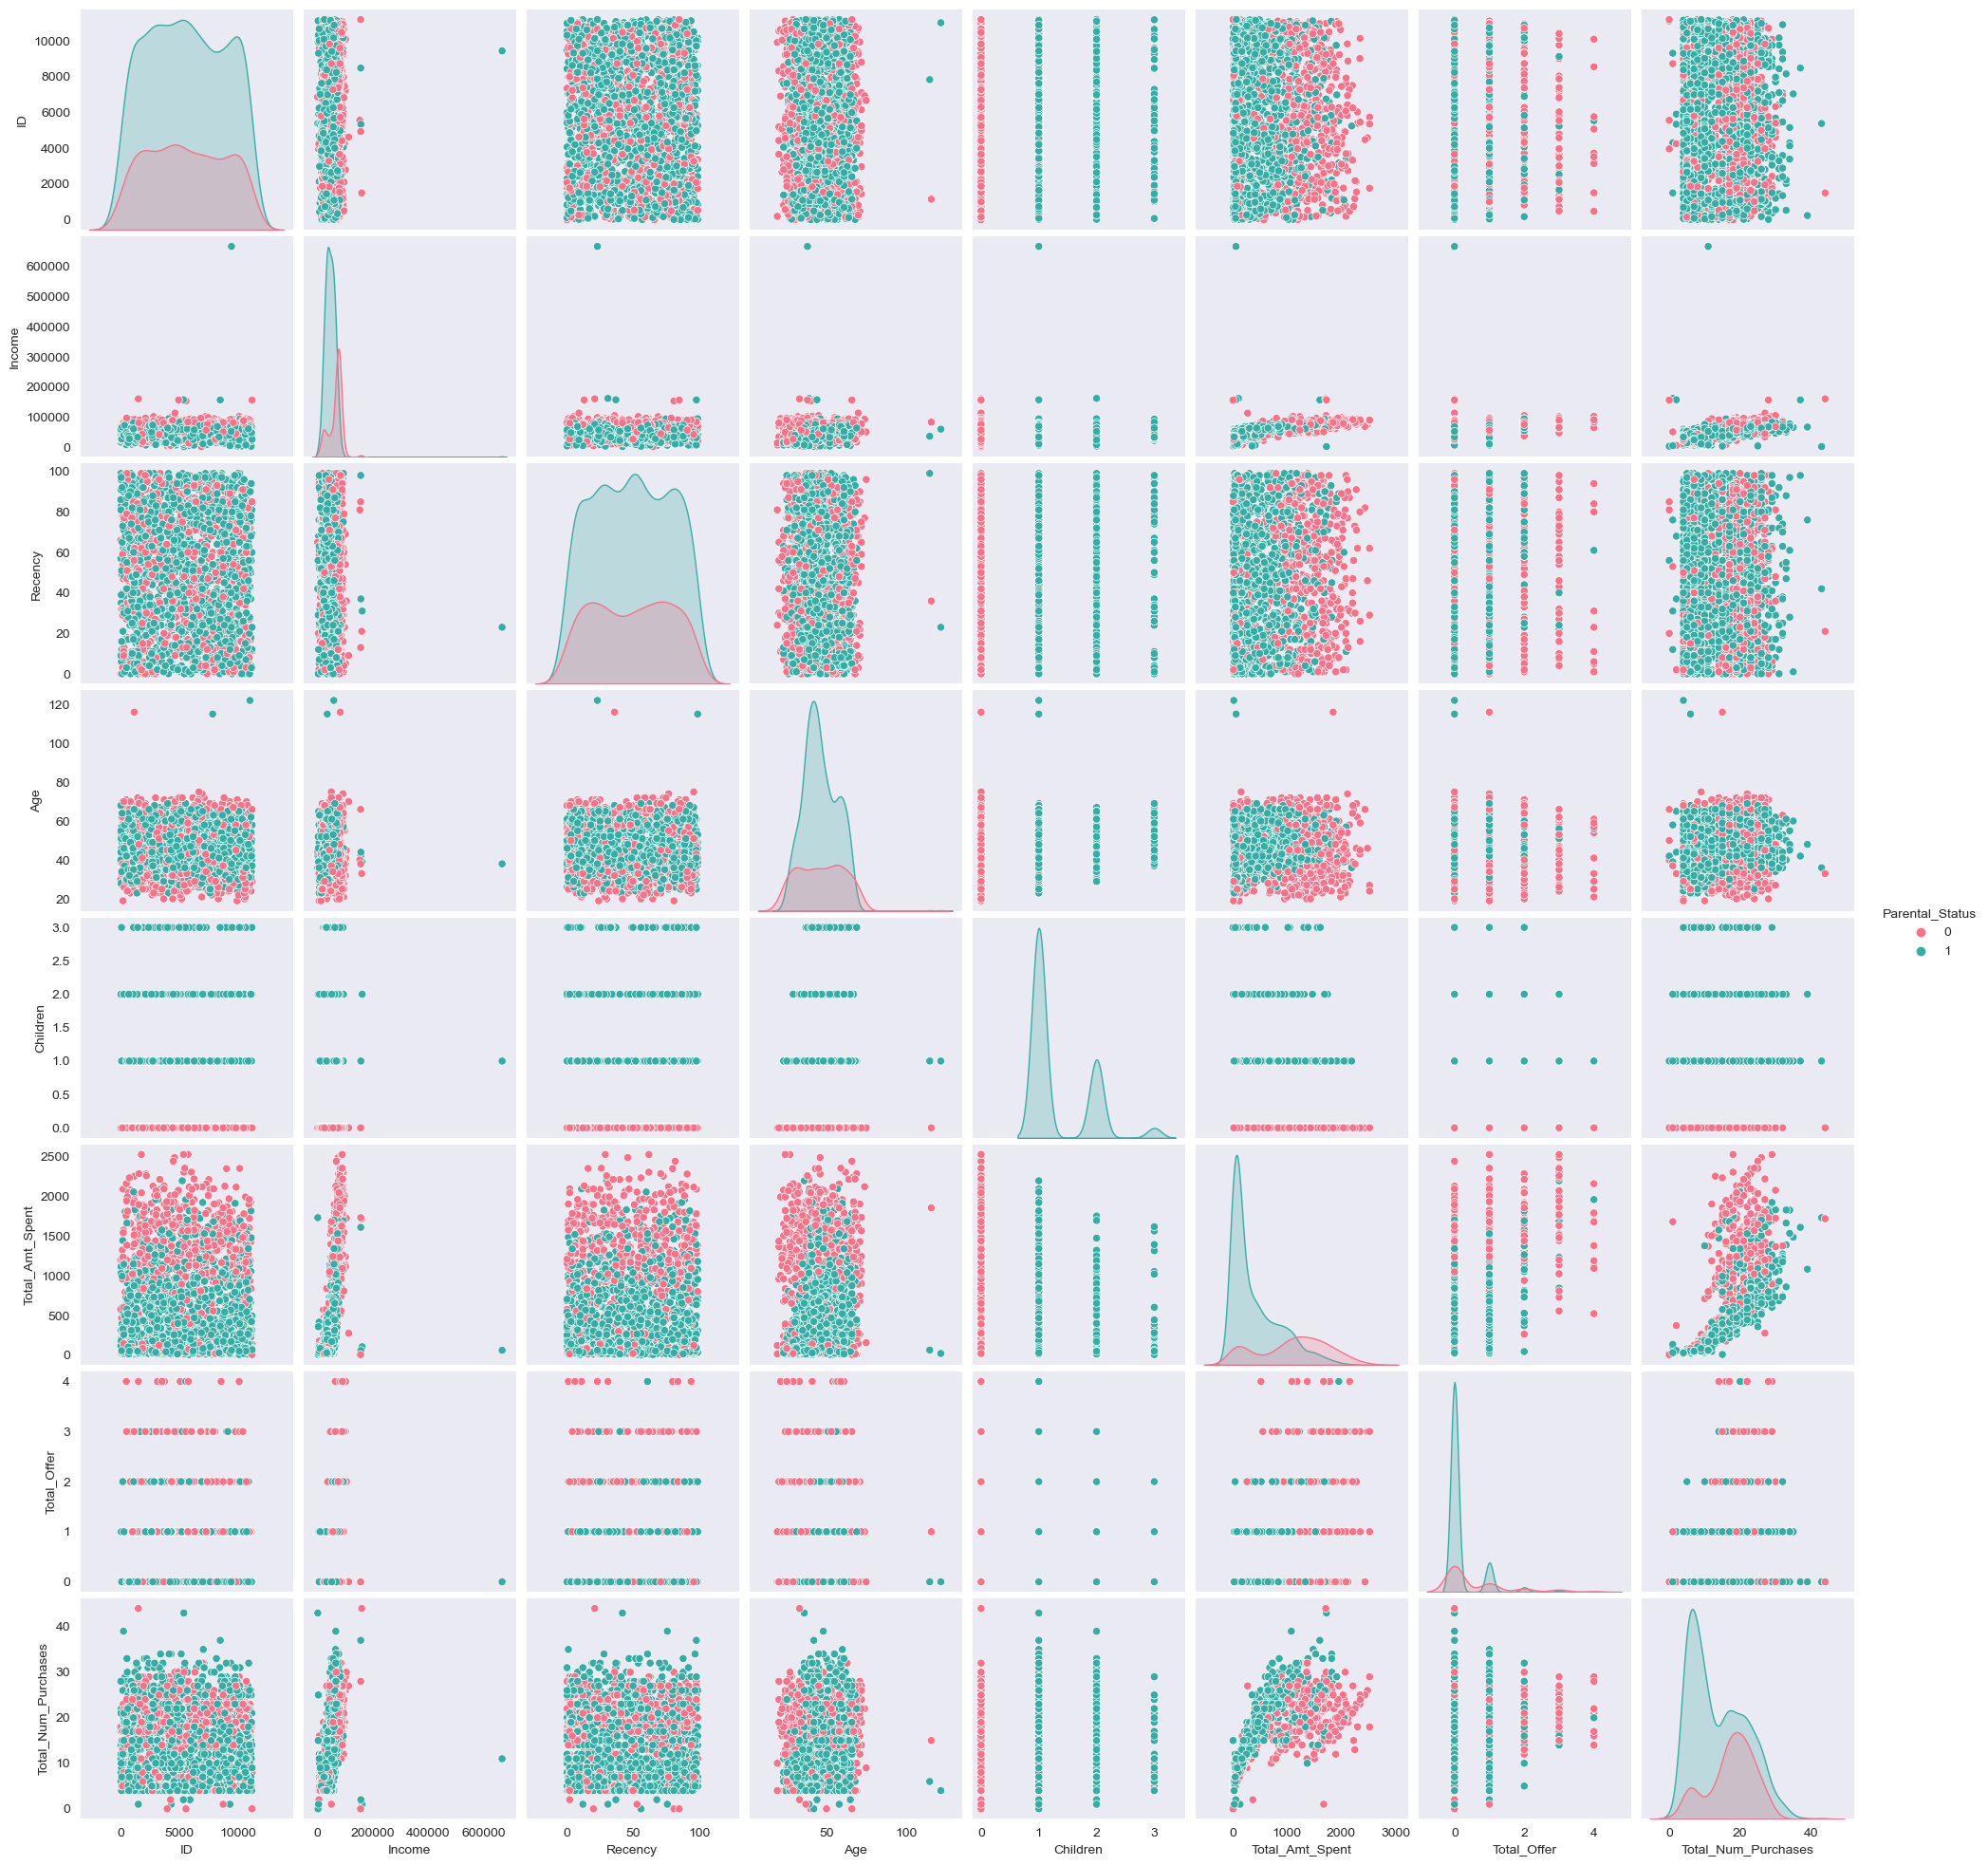

In [114]:
sns.pairplot(CRM_Data, hue= "Parental_Status", palette= "husl")

plt.show()

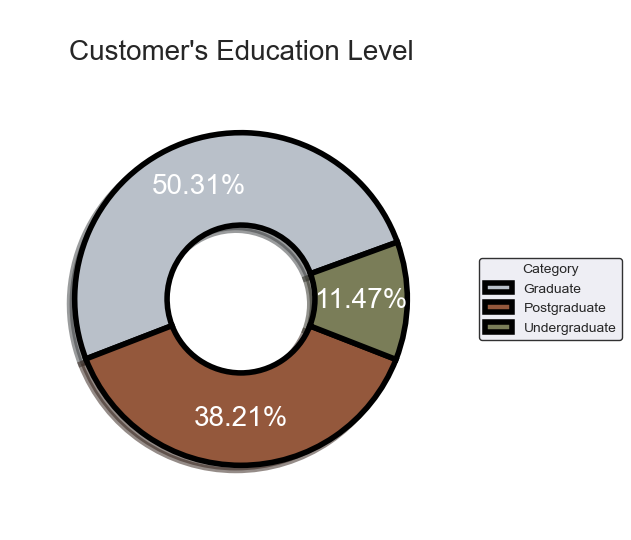

In [116]:
#Age Distribution of Data
plt.subplots(figsize=(6, 6))
labels = "Graduate","Postgraduate","Undergraduate"
size = 0.5
wedges, texts, autotexts = plt.pie([CRM_Data["Education"].value_counts()[0],
                                    CRM_Data["Education"].value_counts()[1],
                                    CRM_Data["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#B9C0C9","#94583C","#7A7D58"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 20)
plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20);
plt.show()

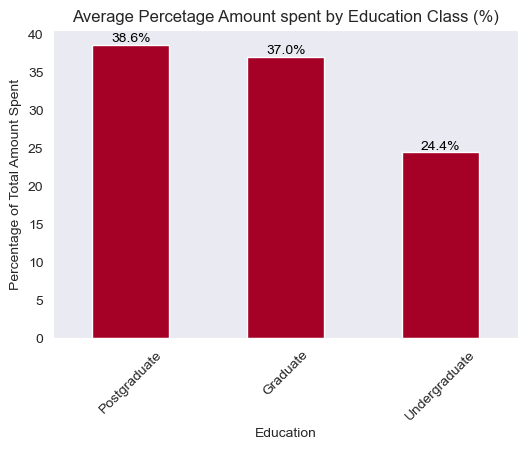

In [118]:
#Average Percentage Amount spent by Education Class
# Group by Education and calculate mean
Total_Amt_Spent = CRM_Data.groupby("Education")["Total_Amt_Spent"].mean().sort_values(ascending=False)

# Calculate percentages
Total_Amt_Spent = (Total_Amt_Spent / Total_Amt_Spent.sum()) * 100
ax = Total_Amt_Spent.plot(kind='bar', figsize=(6, 4), colormap='RdYlBu')

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
plt.title("Average Percetage Amount spent by Education Class (%)")
plt.xlabel("Education")
plt.ylabel("Percentage of Total Amount Spent")
plt.xticks(rotation=45)
plt.show()

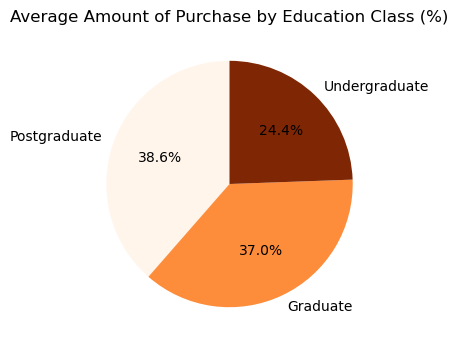

In [29]:
# Calculate mean by Education
Total_Amt_Purchase = CRM_Data.groupby("Education")["Total_Num_Purchases"].sum().sort_values(ascending=False)

# Convert to percentages
Total_Amt_Spent = (Total_Amt_Spent / Total_Amt_Spent.sum()) * 100
ax = Total_Amt_Spent.plot(kind='pie', 
                              figsize=(4, 4), 
                              autopct='%1.1f%%',
                              startangle=90,
                              colormap='Oranges')
plt.title("Average Amount of Purchase by Education Class (%)")
plt.ylabel("")
plt.show()

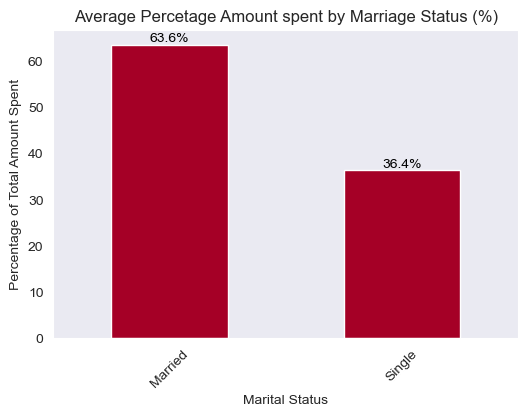

In [178]:
#Average Percentage Amount spent by Education Class
# Group by Education and calculate mean
Total_Amt_Spent = CRM_Data.groupby("Marital_Status")["Total_Amt_Spent"].sum().sort_values(ascending=False)

# Calculate percentages
Total_Amt_Spent = (Total_Amt_Spent / Total_Amt_Spent.sum()) * 100
ax = Total_Amt_Spent.plot(kind='bar', figsize=(6, 4), colormap='RdYlBu')

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
plt.title("Average Percetage Amount spent by Marriage Status (%)")
plt.xlabel("Marital Status")
plt.ylabel("Percentage of Total Amount Spent")
plt.xticks(rotation=45)
plt.show()

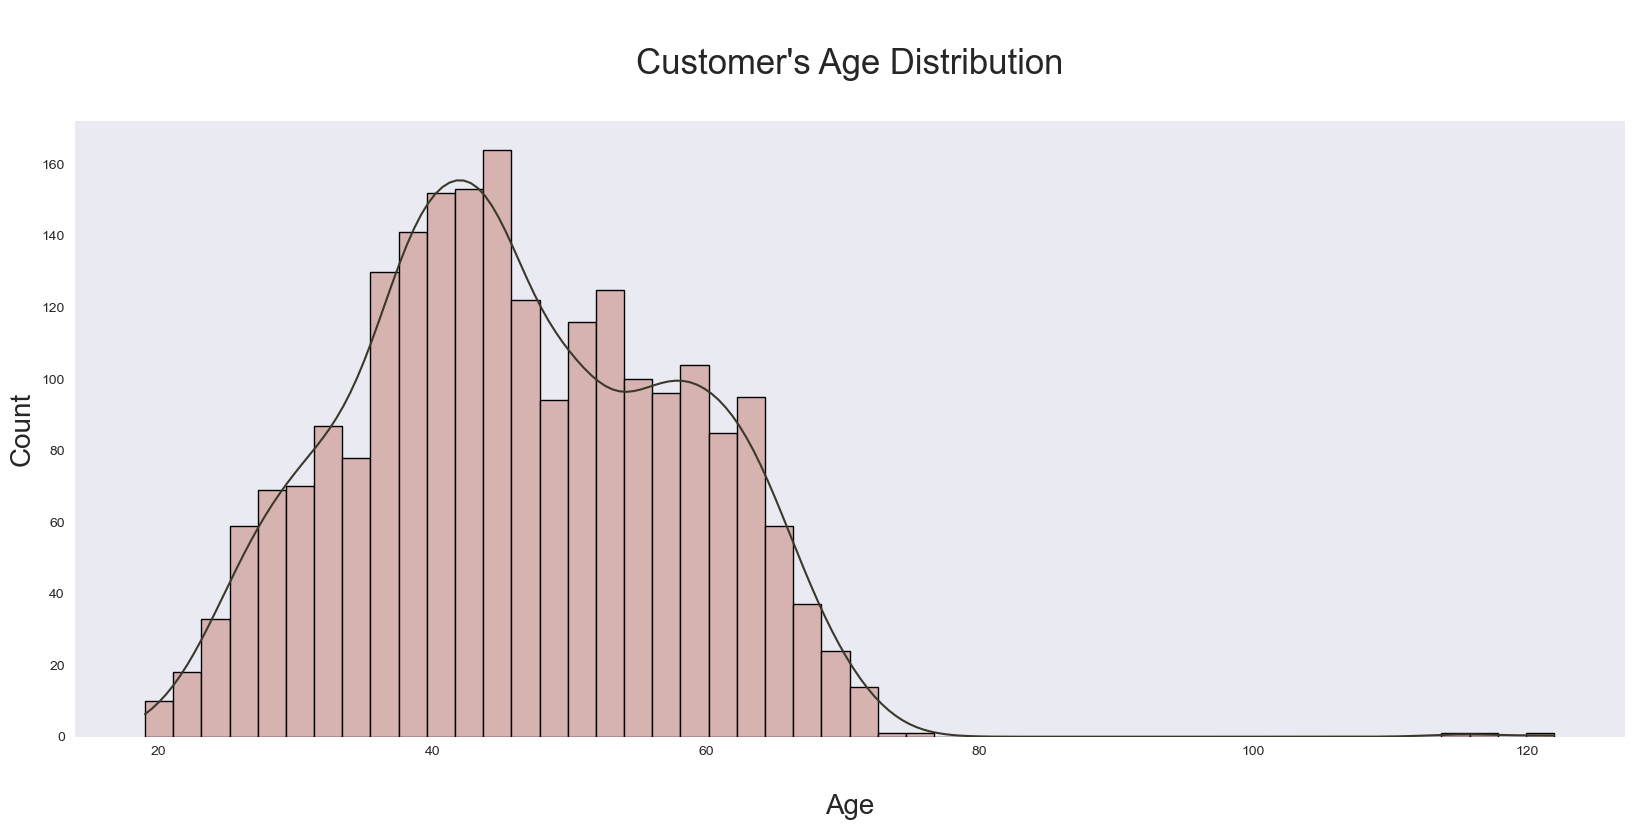

In [120]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(CRM_Data["Age"],color="#D6B2B1",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
palette = ["#101B15","#3A392B","#7A7D58","#FFF7B6","#DD9954","#94583C","#601600"]
p.axes.lines[0].set_color(palette[1])
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

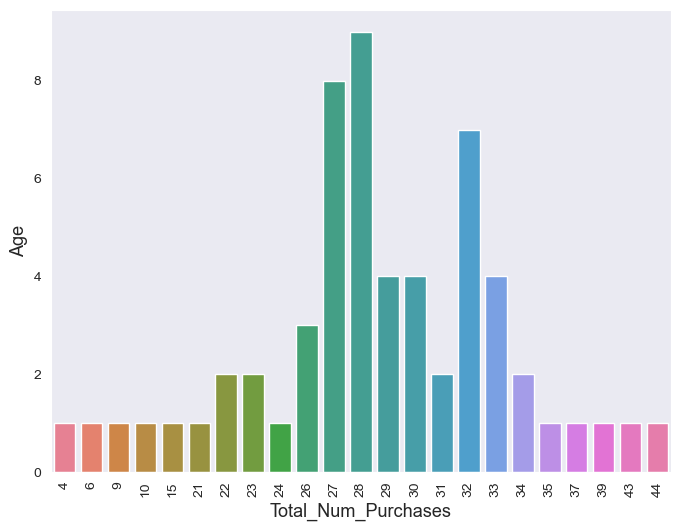

In [33]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR BY AGE
grouped = CRM_Data.groupby("Age")["Total_Num_Purchases"].aggregate("max").reset_index()
grouped = grouped.Total_Num_Purchases.value_counts()

sns.set_style('dark')
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values, palette="husl", ax=ax)
sns.color_palette("husl", 10)

plt.ylabel('Age', fontsize=13)
plt.xlabel('Total_Num_Purchases', fontsize=13)
plt.show()

## Analysing the RFM Metrics

In [35]:
CRM_Data.head()

,ID,Education,Marital_Status,Income,Recency,Age,Children,Parental_Status,Total_Amt_Spent,Total_Offer,Total_Num_Purchases
0,5524,Graduate,Single,58138.000,58,58,0,0,1617,0,25
1,2174,Graduate,Single,46344.000,38,61,2,1,27,0,6
2,4141,Graduate,Married,71613.000,26,50,0,0,776,0,21
3,6182,Graduate,Married,26646.000,26,31,1,1,53,0,8
4,5324,Postgraduate,Married,58293.000,94,34,1,1,422,0,19


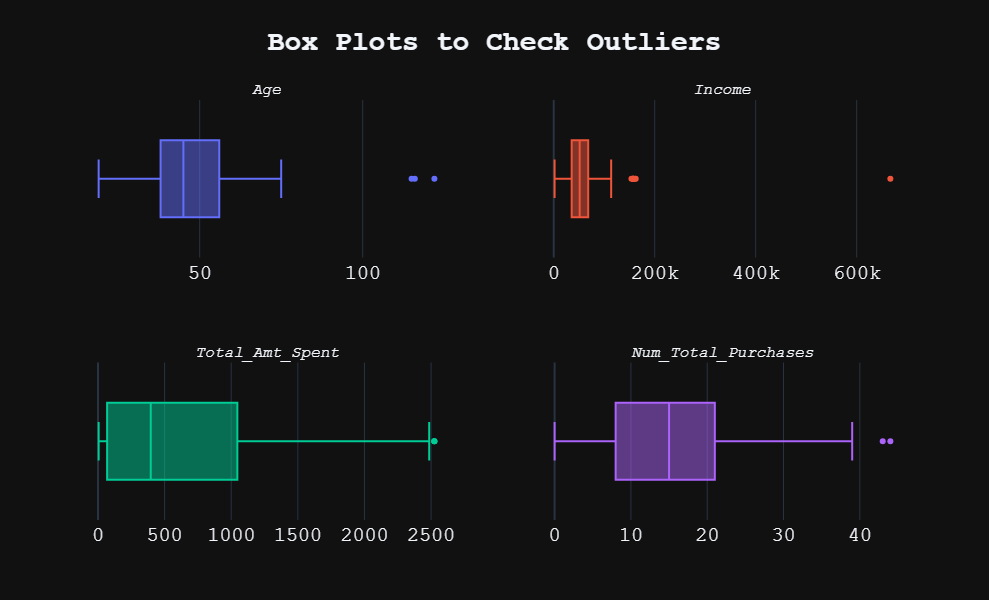

In [126]:
#Visualizing the outlier values

fig=make_subplots(rows=2,cols=2,subplot_titles=('<i>Age', '<i>Income', '<i>Total_Amt_Spent', '<i>Num_Total_Purchases'))
fig.add_trace(go.Box(x=CRM_Data['Age'],name='Age'),row=1,col=1)
fig.add_trace(go.Box(x=CRM_Data['Income'],name='Income'),row=1,col=2)
fig.add_trace(go.Box(x=CRM_Data['Total_Amt_Spent'],name='Total_Amt_Spent'),row=2,col=1)
fig.add_trace(go.Box(x=CRM_Data['Total_Num_Purchases'],name='Total_Num_Purchases'),row=2,col=2)

fig.update_yaxes(visible=False, showticklabels=False)
fig.update_layout(height=600, width=1000, title_text='<b>Box Plots to Check Outliers', font_size=20)
fig.update_layout(
    template='plotly_dark',
    title_x=0.5,
    font_family='Courier New',
    showlegend=False
)

In [128]:
# Define both functions first
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.15)
    quartile3 = dataframe[variable].quantile(0.85)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit.round(), up_limit.round()

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [132]:
replace_with_thresholds(CRM_Data, "Age")
replace_with_thresholds(CRM_Data, "Income")
replace_with_thresholds(CRM_Data, "Total_Amt_Spent")
replace_with_thresholds(CRM_Data, "Total_Num_Purchases")

In [134]:
CRM_Data['Frequency'] = CRM_Data["Total_Num_Purchases"]
CRM_Data['Monetary'] = CRM_Data["Total_Amt_Spent"]
CRM_Data.head()

,ID,Education,Marital_Status,Income,Recency,Age,Children,Parental_Status,Total_Amt_Spent,Total_Offer,Total_Num_Purchases,Frequency,Monetary
0,5524,Graduate,Single,58138.000,58,58,0,0,1617,0,25,25,1617
1,2174,Graduate,Single,46344.000,38,61,2,1,27,0,6,6,27
2,4141,Graduate,Married,71613.000,26,50,0,0,776,0,21,21,776
3,6182,Graduate,Married,26646.000,26,31,1,1,53,0,8,8,53
4,5324,Postgraduate,Married,58293.000,94,34,1,1,422,0,19,19,422


In [136]:
RFM_Metric = CRM_Data.loc[:, ['Recency', 'Frequency', 'Monetary']]

In [138]:
RFM_Metric.head()

,Recency,Frequency,Monetary
0,58,25,1617
1,38,6,27
2,26,21,776
3,26,8,53
4,94,19,422


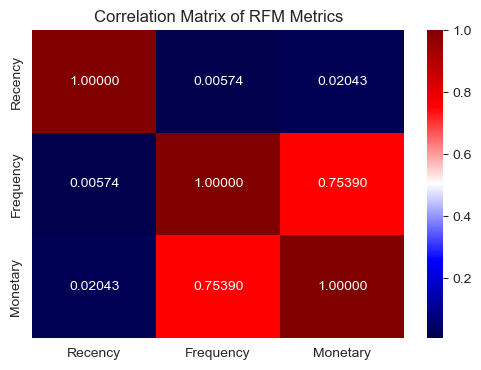

In [140]:
## A correlation Matrix to see how the RFM variables correlate

plt.figure(figsize=(6, 4))
correlation_matrix = CRM_Data[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt='.5f')
plt.title('Correlation Matrix of RFM Metrics')
plt.show()

In [142]:
def RFM_scores(df):
    # Assign scores using quantiles (1 = worst, 5 = best)
    RFM_Metric["recency_score"] = pd.qcut(RFM_Metric["Recency"], 5, labels=[5, 4, 3, 2, 1])
    RFM_Metric["frequency_score"] = pd.qcut(RFM_Metric["Frequency"], 5, labels=[1, 2, 3, 4, 5])
    RFM_Metric["monetary_score"] = pd.qcut(RFM_Metric["Monetary"], 5, labels=[1, 2, 3, 4, 5])
    
# Combine scores into RFM score
    RFM_Metric["rfm_score"] = (
        RFM_Metric["recency_score"].astype(str) + RFM_Metric["frequency_score"].astype(str)
        
# Mapping the RFM scores to customer segments
    )
    segment_map = {
        r"[1-2][1]": "Lost",
        r'[1-2][1-2]': 'Hibernating',
        r'[1-2][3-4]': 'At_Risk',
        r'[1-2]5': 'Cant_lose',
        r'3[1-2]': 'About_to_sleep',
        r'33': 'Need_Attention',
        r'[3-4][4-5]': 'Loyal_Customers',
        r'41': 'Promising_Customers',
        r'51': 'New_Customers',
        r'[4-5][2-3]': 'Potential_Loyalists',
        r'5[4-5]': 'Champions',               
    }
    # Apply segmentation
    RFM_Metric["segment"] = RFM_Metric["rfm_score"].replace(segment_map, regex=True)
    
    return RFM_Metric

In [144]:
RFM_Metric = RFM_scores(RFM_Metric)
print(RFM_Metric.head(10))

   Recency  Frequency  Monetary recency_score frequency_score monetary_score rfm_score              segment
0       58         25      1617             3               5              5        35      Loyal_Customers
1       38          6        27             4               1              1        41  Promising_Customers
2       26         21       776             4               4              4        44      Loyal_Customers
3       26          8        53             4               2              1        42  Potential_Loyalists
4       94         19       422             1               4              3        14              At_Risk
5       16         22       716             5               4              4        54            Champions
6       34         21       590             4               4              3        44      Loyal_Customers
7       32         10       169             4               2              2        42  Potential_Loyalists
8       19          6       

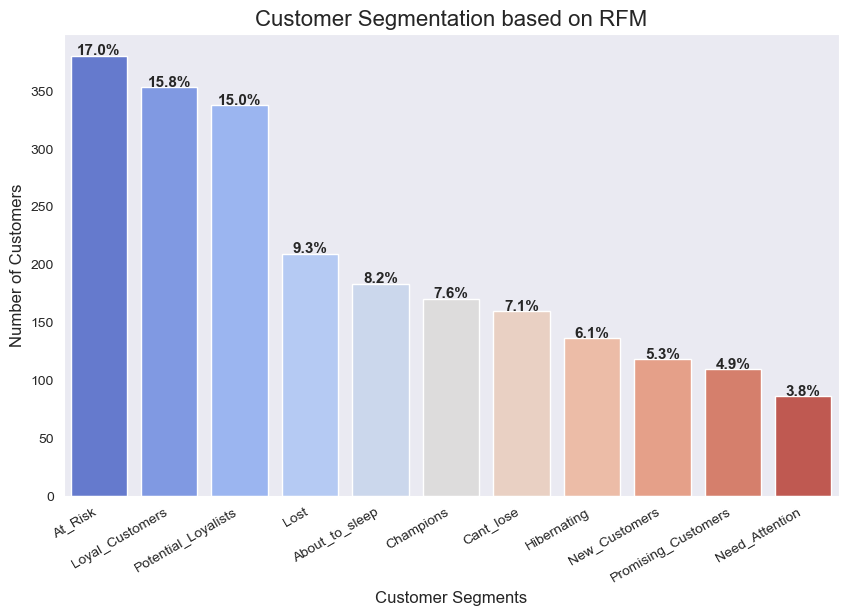

In [146]:
# Count customers in each segment
segment_counts = RFM_Metric["segment"].value_counts().sort_values(ascending=False)

# Calculating the percentage for each segment:
segment_percent = (segment_counts / segment_counts.sum()) * 100

plt.figure(figsize=(10,6))
ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="coolwarm")

# Add percentages on top of bars
for i, value in enumerate(segment_counts.values):
    percent = segment_percent.values[i]
    ax.text(i, value + 1, f"{percent:.1f}%", ha="center", fontsize=11, fontweight="bold")

plt.title("Customer Segmentation based on RFM", fontsize=16)
plt.xlabel("Customer Segments", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.show()

## Linear Regression to understand how RFM variables correlate

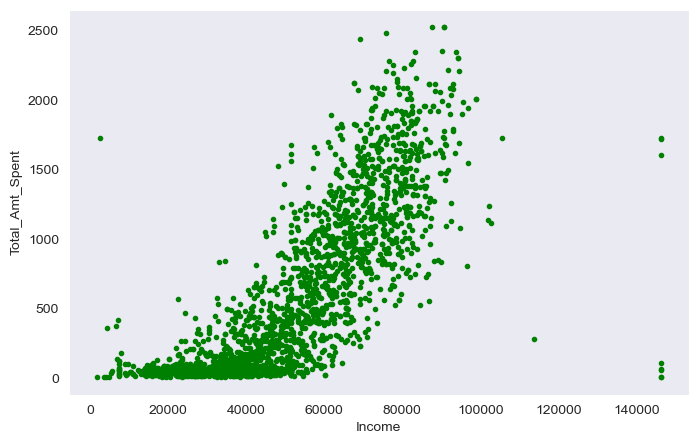

In [148]:
X = CRM_Data["Income"].values
y = CRM_Data["Total_Amt_Spent"].values

# reshaping X with numpy
X = np.reshape(np.asarray(X), (len(X),1))

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X, y, color="green", marker=".")
ax.set_xlabel("Income")
ax.set_ylabel("Total_Amt_Spent")
plt.show()

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [152]:
# creating the model and training it
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [154]:
# here we observe pretty high value of R2 as for having only two variables
r2 = reg.score(X_test, y_test)
print(f"R2: {r2:.3f}")

R2: 0.630


In [156]:
y_predict = reg.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 113867.17
MAE: 253.23


In [158]:
intercept = reg.intercept_
Coef = reg.coef_[0]

print (f"Income = {intercept:.3f} + {Coef:.3f} · Total_Amt_Spent")

Income = -566.619 + 0.023 · Total_Amt_Spent


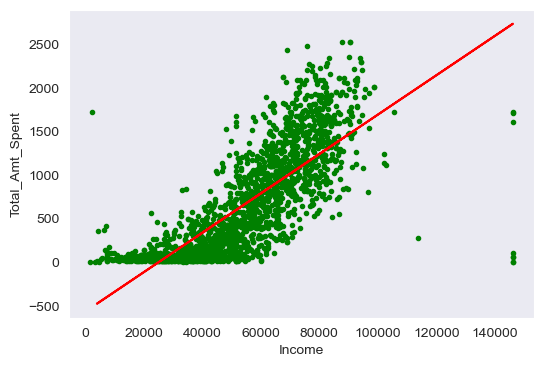

In [163]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X, y, color="green", marker=".")
ax.plot(X_test, y_predict, color="red")
ax.set_xlabel("Income")
ax.set_ylabel("Total_Amt_Spent")
plt.show()

In [160]:
CRM_Data.head()

,ID,Education,Marital_Status,Income,Recency,Age,Children,Parental_Status,Total_Amt_Spent,Total_Offer,Total_Num_Purchases,Frequency,Monetary
0,5524,Graduate,Single,58138.000,58,58,0,0,1617,0,25,25,1617
1,2174,Graduate,Single,46344.000,38,61,2,1,27,0,6,6,27
2,4141,Graduate,Married,71613.000,26,50,0,0,776,0,21,21,776
3,6182,Graduate,Married,26646.000,26,31,1,1,53,0,8,8,53
4,5324,Postgraduate,Married,58293.000,94,34,1,1,422,0,19,19,422
